In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("TaxiFare.csv")
data

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup'])


In [5]:
data["year"]=data['date_time_of_pickup'].dt.year
data["Month"]=data['date_time_of_pickup'].dt.month
data["Day"]=data['date_time_of_pickup'].dt.day
data["Hour"]=data['date_time_of_pickup'].dt.hour
data["Minute"]=data['date_time_of_pickup'].dt.minute
data["Day_of_week"]=data["date_time_of_pickup"].dt.dayofweek

In [6]:
data.drop("date_time_of_pickup", axis=1, inplace=True)

In [7]:
data

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Day,Hour,Minute,Day_of_week
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,0
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,1
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,3
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,5
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,23,25,2
49996,19:18.0,7.5,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,17,19,0
49997,53:00.0,6.9,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,4,53,6
49998,09:00.0,4.5,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,7,9,1


In [8]:
data.dtypes

unique_id                object
amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
year                      int64
Month                     int64
Day                       int64
Hour                      int64
Minute                    int64
Day_of_week               int64
dtype: object

In [9]:
data["no_of_passenger"].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

In [10]:
data["no_of_passenger"]=data["no_of_passenger"].replace(0,data["no_of_passenger"].mode()[0])

<Axes: title={'center': 'Box plot for charges of passenger'}, xlabel='amount', ylabel='no_of_passenger'>

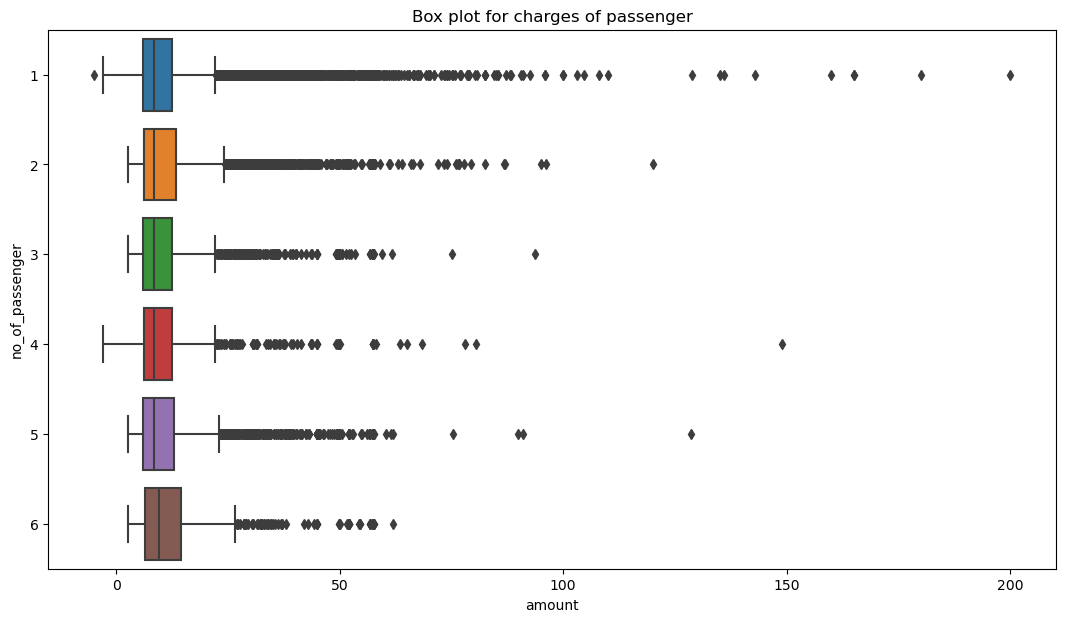

In [11]:
plt.figure(figsize=(13,7))
plt.title('Box plot for charges of passenger')
sns.boxplot(y="no_of_passenger",x="amount",data=data,orient='h')

<Axes: title={'center': 'Box plot for number of days'}, xlabel='amount', ylabel='Day_of_week'>

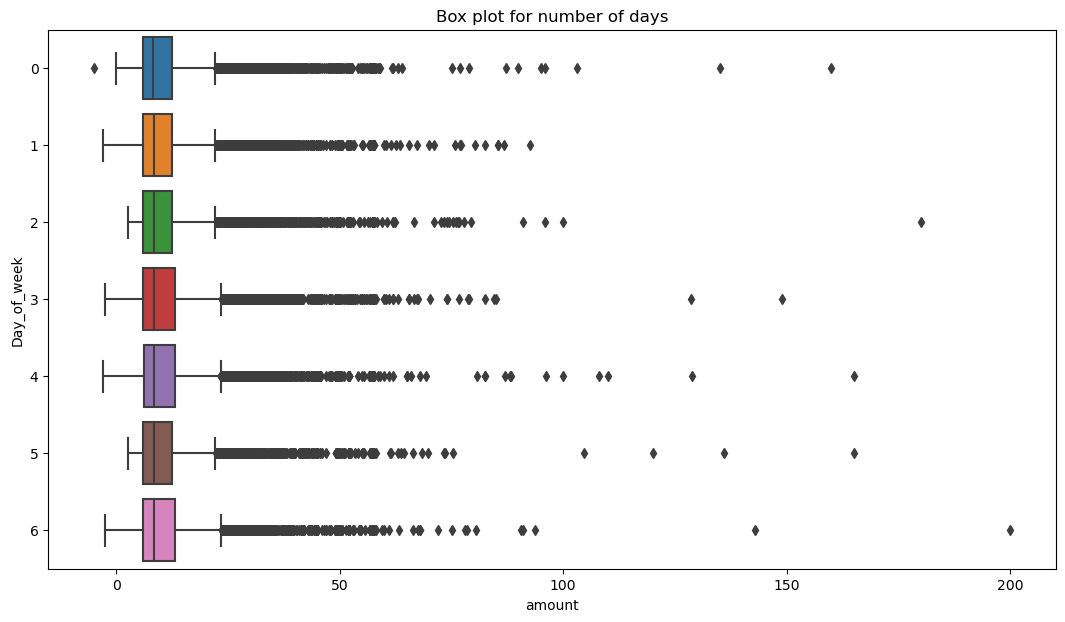

In [12]:
plt.figure(figsize=(13,7))
plt.title('Box plot for number of days')
sns.boxplot(y="Day_of_week",x="amount",data=data,orient='h')

<Axes: title={'center': 'Box plot'}, xlabel='amount', ylabel='Hour'>

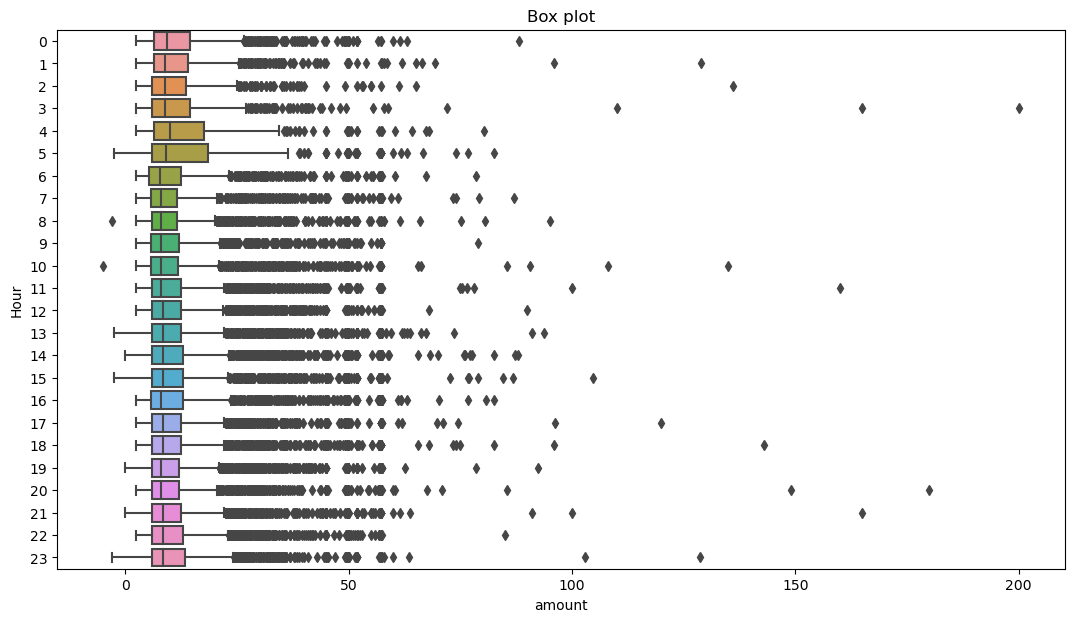

In [13]:
plt.figure(figsize=(13,7))
plt.title('Box plot')
sns.boxplot(y="Hour",x="amount",data=data,orient='h')

In [14]:
data["Day_of_week"]

0        0
1        1
2        3
3        5
4        1
        ..
49995    2
49996    0
49997    6
49998    1
49999    2
Name: Day_of_week, Length: 50000, dtype: int64

In [15]:
# calculating distance based on latitude and logitude

#defining a function to calculate the distance given latitude and logitude

def hav_dist(lat1,lon1,lat2,lon2):
    dlat=np.radians(lat2-lat1)
    dlon=np.radians(lon2-lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    
    a=(np.sin(dlat/2)** 2+np.sin(dlon/2)**2 * np.cos(lat1)* np.cos(lat2))
    rad=6371 #Earth's radius in kilometers
    c=2*np.arcsin(np.sqrt(a))
    
    distance =rad*c
    return distance

In [16]:
data.columns

Index(['unique_id', 'amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'year', 'Month', 'Day', 'Hour', 'Minute', 'Day_of_week'],
      dtype='object')

In [17]:
data["Distance"]=hav_dist(data["latitude_of_pickup"],data["longitude_of_pickup"],data["latitude_of_dropoff"],data["longitude_of_dropoff"])

In [18]:
data.head()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Day,Hour,Minute,Day_of_week,Distance
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,0,1.030764
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,1,8.450134
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,3,1.389525
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,5,2.799270
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,1,1.999157


In [19]:
data.isnull().sum()

unique_id               0
amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
year                    0
Month                   0
Day                     0
Hour                    0
Minute                  0
Day_of_week             0
Distance                0
dtype: int64

In [20]:
data.drop("unique_id",axis=1,inplace=True)

# Feature selection using random forest

In [21]:
x=data.drop("amount",axis=1)
y=data.amount

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [23]:
rf.fit(x,y)

RandomForestRegressor()

In [24]:
feature_importances =pd.Series(rf.feature_importances_,index=x.columns)

In [25]:
feature_importances.sort_values(ascending=False,inplace=True)

In [26]:
feature_importances

Distance                0.749594
longitude_of_dropoff    0.046250
latitude_of_dropoff     0.035359
longitude_of_pickup     0.033870
year                    0.027027
latitude_of_pickup      0.023231
Minute                  0.018763
Hour                    0.018275
Day                     0.017117
Month                   0.015596
Day_of_week             0.009950
no_of_passenger         0.004968
dtype: float64

In [27]:
data

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Day,Hour,Minute,Day_of_week,Distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,0,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,1,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,3,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,5,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,1,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,23,25,2,4.940374
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,17,19,0,0.874706
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,4,53,6,2.263286
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,7,9,1,0.665245


Text(0, 0.5, 'amount')

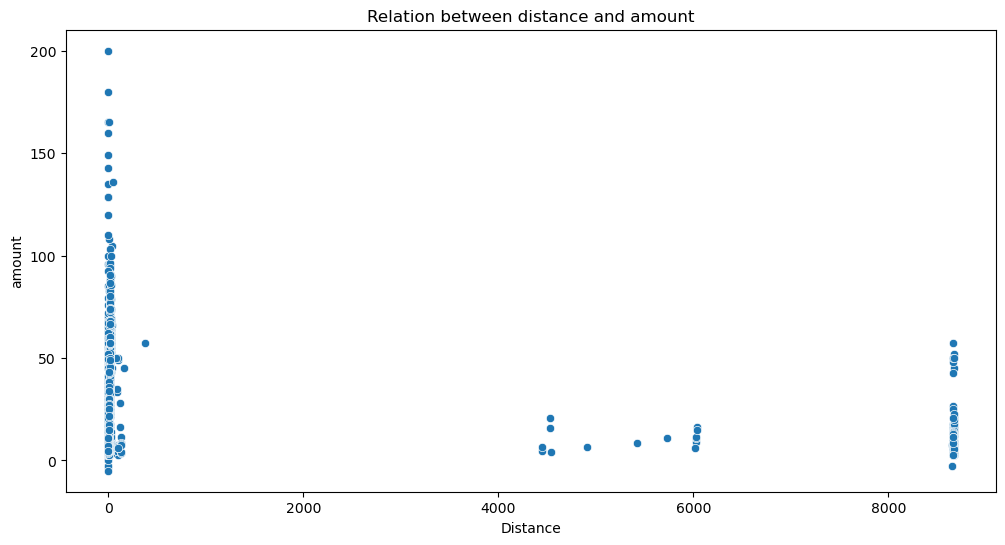

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['Distance'],y=data['amount'], data=data)
plt.title("Relation between distance and amount")
plt.xlabel("Distance")
plt.ylabel("amount")

In [29]:
x=data.drop("amount",axis=1)
y=data.amount

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [31]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((37500, 12), (37500,), (12500, 12), (12500,))

In [32]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [33]:
#making prediction
y_pred=reg.predict(x_test)

In [34]:
#model evaluation
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score",metrics.r2_score(y_test,y_pred))

MAE 6.052741151653954
RMSE 9.953541864015541
R2 Score 0.01579428965355245


# Decision Tree Regression

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dt=DecisionTreeRegressor()

In [37]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [38]:
#makeprediction with the model
pred =dt.predict(x_test)

In [39]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("R2 Score",metrics.r2_score(y_test,pred))

MAE 2.9434304000000004
RMSE 6.4772283813371905
R2 Score 0.583217950462761


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf=RandomForestRegressor(150)

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
# makes prediction with the model
r_pred = rf.predict(x_test)

In [ ]:

print("MAE",metrics.mean_absolute_error(y_test,r_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, r_pred)))
print("R2 Score",metrics.r2_score(y_test,r_pred))